In [19]:
# imports
import numpy as np
from scipy.optimize import fsolve
from scipy.special import factorial
import matplotlib.pyplot as plt

# Assignment 1
_Social graphs and interactions (02805)_

## Part 2: Random networks and plotting in `networkx`

### A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

* Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{–3}$.

* What is the expected number of links, $〈L〉$?

The maximum number of links $L_{max}$  is computed using the following formula: 

$L_{max} = \frac{N(N-1)}{2}$

Given the probability $p = 10^{–3}$ of nodes connected to each other we can computed the expected number of links:

In [20]:
N = 3000 # number of nodes
p = 1e-3 # probability of nodes being connected
(L) = (p * N * (N - 1)) / 2
print('expected number of links <L>:', (L))

expected number of links <L>: 4498.5


* In which regime is the network?

The regime can easily be tested given *N* and *p* as follows:

In [21]:
print("Subcritical Regime: ", p < 1 / N)
print("Critical Point: ", p == 1 / N)
print("Supercritical Regime: ", p > 1 / N)
print("Connected Regime: ", p > np.log(N) / N)

Subcritical Regime:  False
Critical Point:  False
Supercritical Regime:  True
Connected Regime:  False


Thus, it can be said that the network is in the supercritical regime. Having one gaint component where numerous isolated components coexist with the gaint component - the supercritical regime lasting until all nodes are absorbed by the gaint component.

* Calculate the probability $p_{c}$ so that the network is at the critical point.

The probability $p_{c}$ so that the network is at the critical point is computed using the following formula: $p = \frac{1}{(N-1)}$

In [22]:
p_c = 1 / (N - 1)
print('Critical Point:', p_c)

Critical Point: 0.00033344448149383126


* Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

The number of nodes $N^{cr}$ given the linking probability $p = 10^{–3}$ is computed using scipy.optimize in order to satisfy the equation $p = \frac{ln(N)}{N}$ so that the network is within the connected regime (having only one component):

In [23]:
# first the equation is defined as a funtion of N
def ncr_connected(N):
    p = 1e-3
    y = (np.log(N) / N) - p
    return y

y_guess = 10000 # guess
ncr = fsolve(ncr_connected, y_guess) # 
print("Number of nodes (Ncr): ", ncr)

Number of nodes (Ncr):  [9118.0064704]


Thus, given the linking probability $p = 10^{–3}$ the number of nodes is ~ 9118 so that the network is within the connected regime (having only one component).

* For the network in (d), calculate the average degree  $〈k^{cr}〉$ and the average distance between two randomly chosen nodes $〈d〉$.

The average degree $〈k^{cr}〉$ is computed using the following formula: 

$〈k^{cr}〉 = p_{cr}\cdot(N_{cr}-1)$

and the average distance $〈d〉$ between two randomly chosen nodes is computed using the following formula:

$〈d〉 = \frac{ln(N)}{ln(〈k^{cr}〉)}$

In [24]:
kcr = p*(ncr - 1)
print("<k_cr>:", kcr)

d = np.log(ncr) / np.log(kcr)
print("<d>:", d)

<k_cr>: [9.11700647]
<d>: [4.12553061]


Thus, the average degree $〈k^{cr}〉$ is ~ 9.1170 and the average distance between two randomly chosen nodes $〈d〉$ is ~ 4.1255.

* Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

The degree distribution $p_k$ of the network is approximated using the possion form:

$p_k = e^{-〈k〉} \frac{〈d〉^k}{k!}$

Degree distribution: [0.13165633]


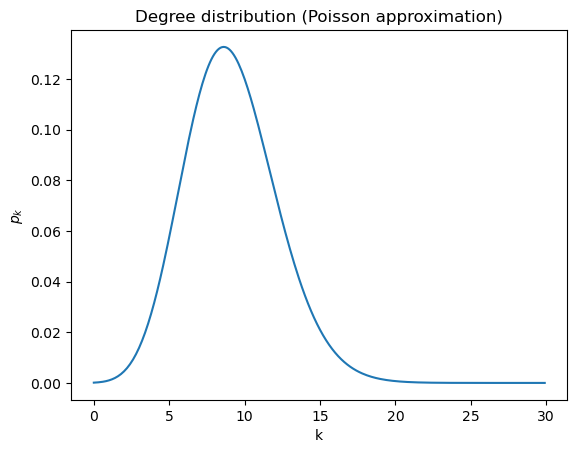

In [25]:
k = p * (ncr - 1)

k = int(k)
pk = np.exp(-kcr) * (kcr**k / np.math.factorial(k))

print("Degree distribution:", pk)

t = np.arange(0, 30, 0.1)
d = np.exp(-kcr)*np.power(kcr, t)/factorial(t)
plt.title("Degree distribution (Poisson approximation)")
plt.ylabel("$p_{k}$")
plt.xlabel("k")
plt.plot(t, d)
plt.show()

The degree distribution is shown in the plot above where the highest probability $p_{k}$ is ~ 0.13 with k around ~ 9 - interestingly the average degree computed early was 9.117.

<!-- TODO -->